# Lab | Comparing regression models

### Lab | Cleaning numerical data (the previous lab)
### A new lab is below the previous lab

### 1.Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2.Load the customer_value_analysis.csv into the variable customer_df. 

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 3.First look at its main features (head, shape, info).

In [3]:
display(data.head())
display(data.shape)
display(data.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

### 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [4]:
data1 = data.copy()
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
#manually change the column of 'employmentstatus'
data = data.rename(columns={'employmentstatus':'employment_status'})
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change the type of effective_to_date column to DateTime format

In [6]:
from datetime import datetime
# Convert "effective_to_date" column to DateTime format
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

# Display the updated data types
print(data.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Check NaN values per column.

In [7]:
#chack the null values
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There are no null values. 

###  7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [8]:
def separate_numerical_categorical(data: pd.DataFrame) -> pd.DataFrame:
    '''
    This function separate data into one with numerical columns and one with categorical columns
    
    Input: pd.DataFrame
    Output: two types of pd.DataFrame
    '''
    numerical_df = data.select_dtypes(np.number)
    categorical_df = data.select_dtypes('object')

    return numerical_df, categorical_df

In [9]:
numerical_categorical = separate_numerical_categorical(data)
numericals = numerical_categorical[0]
display(numericals.head())
categorical = numerical_categorical[1]
display(categorical.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 8. Drop any ID column.

In [10]:
# Drop 'customer' column
categorical = categorical.drop('customer', axis=1)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

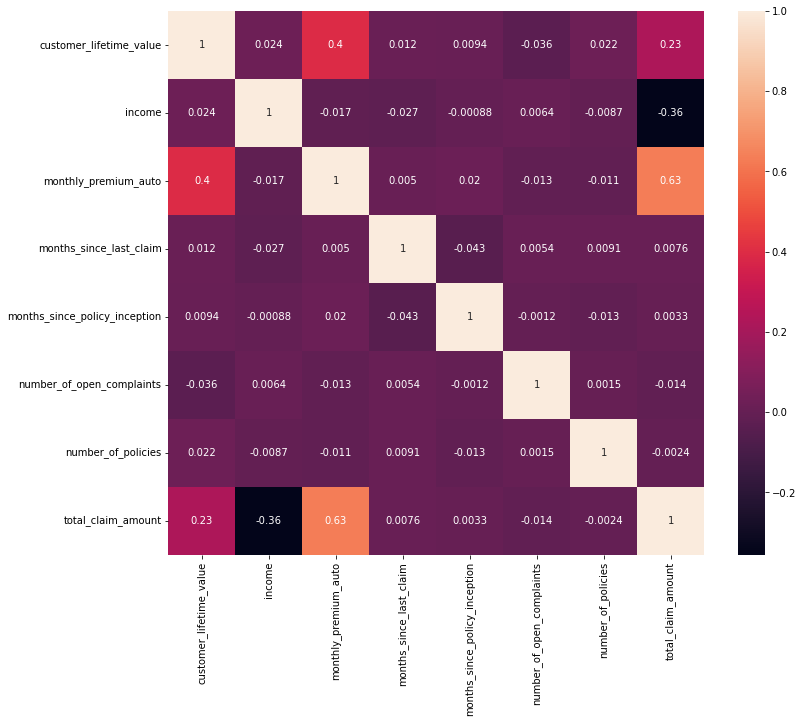

In [11]:
corr_matrix=numericals.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### A pair of the highest correlation is 'monthly_premium_auto' and 'total_claim_amount': 0.63.  It means that customers spend more money to  monthly premuim auto because they tend to claim more.    

### 10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [12]:
def separate_numerical_columns(data: pd.DataFrame, threshold=36) -> pd.DataFrame:
    '''
    This function separate data into one with numerical continous columns and 
    another one with numerical discrete columns.
    The default to discreminate between two is set to 36.
    
    Input:
    pd.DataFrame
    int
    
    Output: pd.DataFrame
    
    '''
    continuous_columns = []
    discrete_columns = []

    for column in data.columns:
        if data[column].dtype in ['int','float']:
            if data[column].nunique() > threshold:
                continuous_columns.append(column)
            else:
                discrete_columns.append(column)

    continuous_df = data[continuous_columns]
    discrete_df = data[discrete_columns]

    return continuous_df, discrete_df

In [13]:
continous_discrete = separate_numerical_columns(numericals)
continuous_df = continous_discrete[0]
display(continuous_df.head())
discrete_df = continous_discrete[1]
display(discrete_df.head())
display(discrete_df.describe())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


,months_since_last_claim,number_of_open_complaints,number_of_policies
count,9134.000000,9134.000000,9134.000000
mean,15.097000,0.384388,2.966170
std,10.073257,0.910384,2.390182
min,0.000000,0.000000,1.000000
25%,6.000000,0.000000,1.000000
50%,14.000000,0.000000,2.000000
75%,23.000000,0.000000,4.000000
max,35.000000,5.000000,9.000000


### 11.Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [14]:
def create_barplots(df:pd.DataFrame)->None:
    
    '''
    This function  create a barplot for all the columns of the discrete_df using seaborn, 
    and set the figuresize = (16,16)
    
    Input: pd.DataFrame
    Output: None
    
    '''
    # Set the figure size
    plt.figure(figsize=(16, 16))
    
    # Get the column names of the dataframe
    columns = df.columns
    
    # Calculate the number of rows and columns for subplots
    n_rows = len(columns) // 3 + (len(columns) % 3 > 0)
    n_cols = 3
    
    # Create subplots
    for i, column in enumerate(columns):
        plt.subplot(n_rows, n_cols, i+1)
        sns.countplot(data=df, y=column)
        plt.title(column)
        plt.xticks(rotation=90)
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()


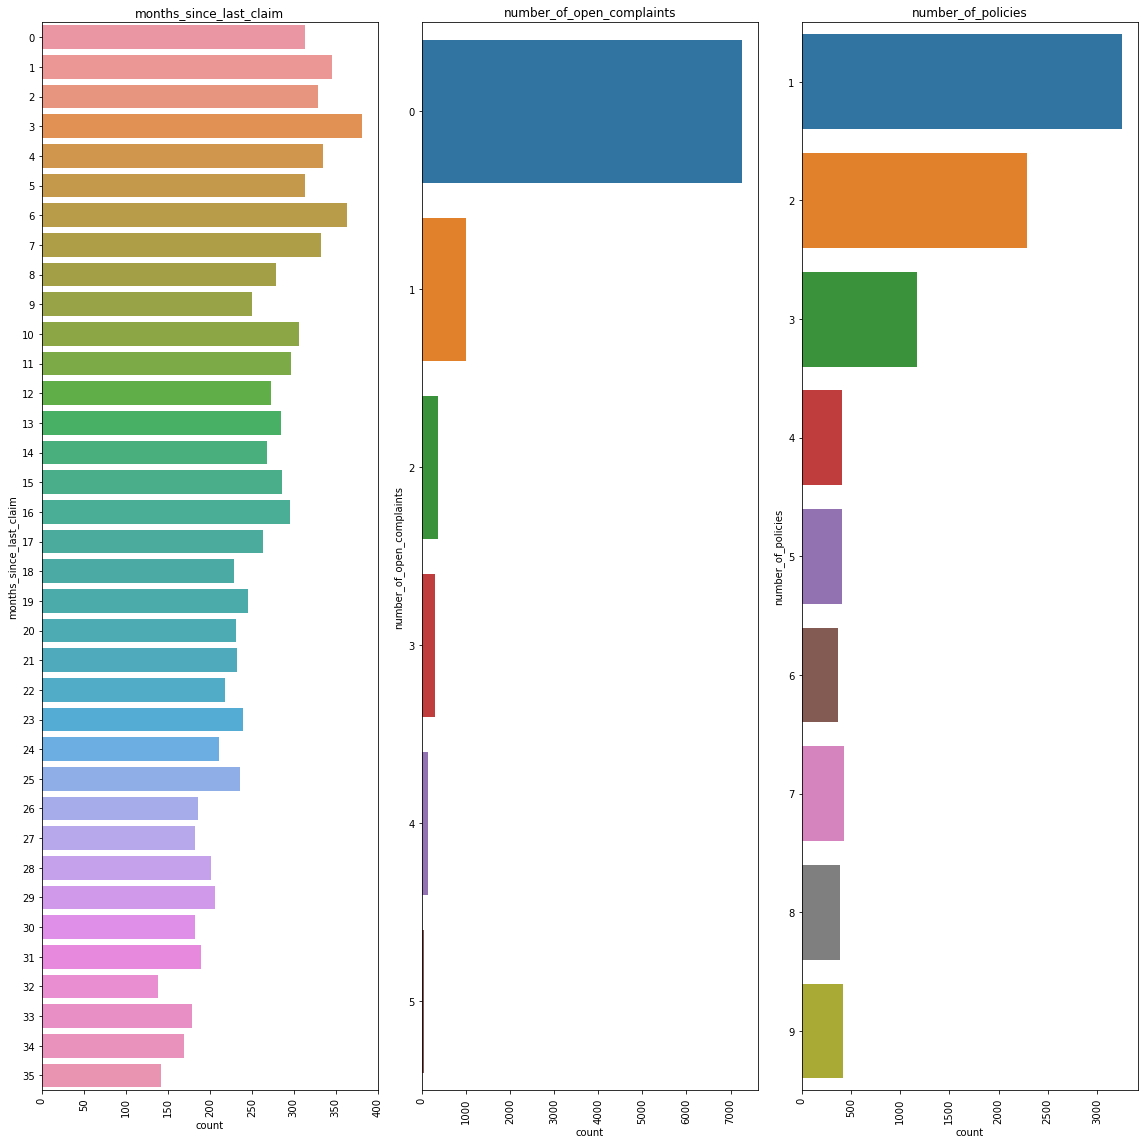

In [15]:
create_barplots(discrete_df)

### 12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [16]:
def create_histograms(dataframe):
    # Set the figure size
    plt.figure(figsize=(16, 16))
    
    # Get the column names of the dataframe
    columns = dataframe.columns
    
    # Calculate the number of rows and columns for subplots
    n_rows = len(columns) // 3 + (len(columns) % 3 > 0)
    n_cols = 3
    
    # Create subplots
    for i, column in enumerate(columns):
        plt.subplot(n_rows, n_cols, i+1)
        sns.histplot(data=dataframe[column])
        #plt.title(column)
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

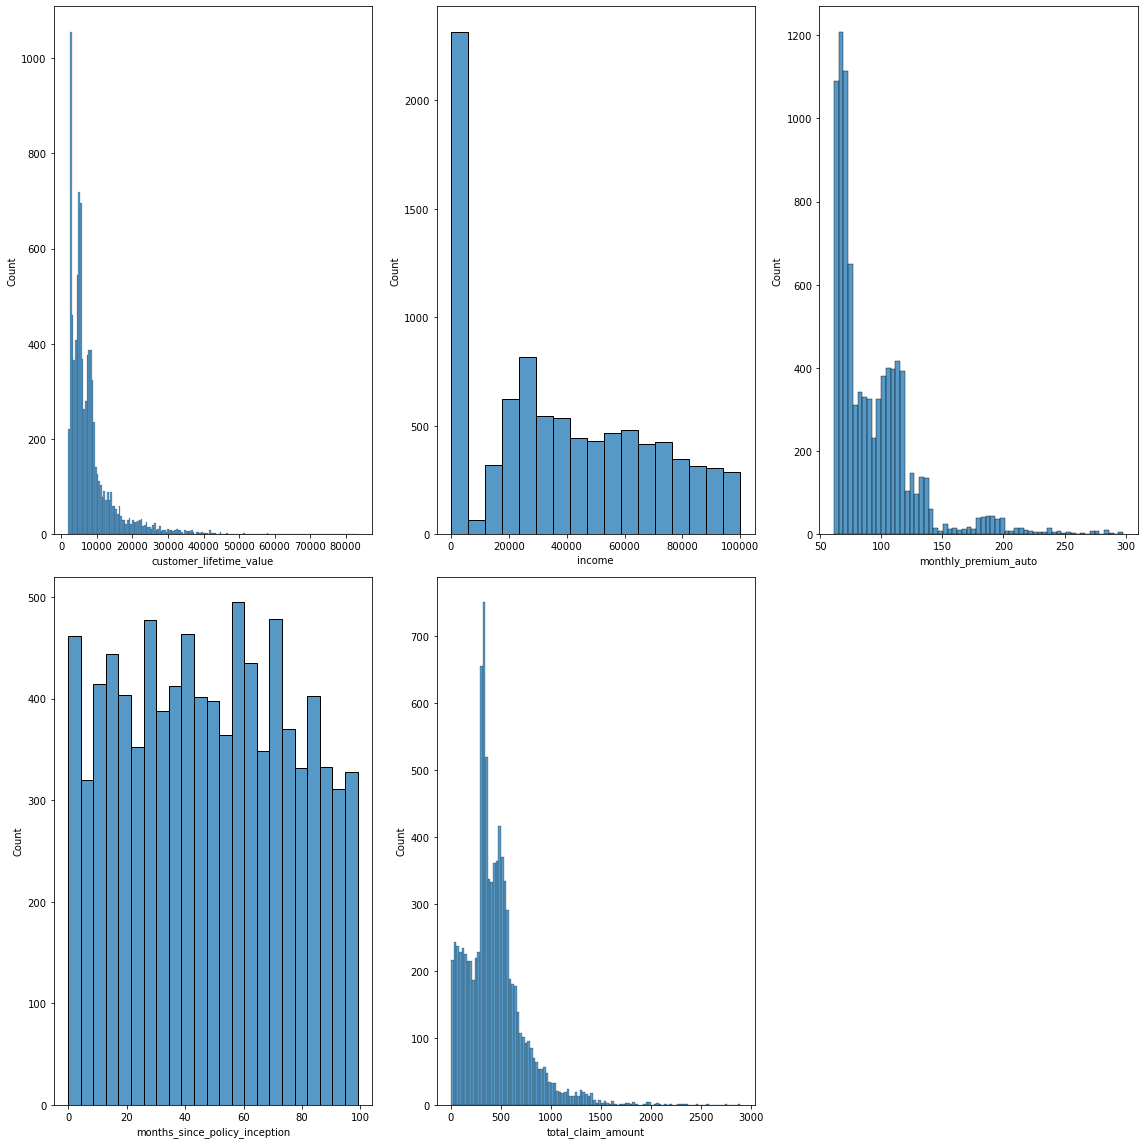

In [17]:
create_histograms(continuous_df)

### 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

#### Looking at the histogram plots, 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount' are skewed and need some transformation.

### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df. 

This time, Z-score is used.

In [18]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [19]:
def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold: int=3) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the z-score
    of every value, and flags the value as "outlier" if it's values is outside the
    [-3,3] range.

    Input:
    df: Pandas DataFrame

    Output:
    Python list of indexes for values which are outliers.
    '''

    df2 = df.copy()
    outliers = []

    df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) )

    outliers = df2[ df2['abs-z-score'] > threshold ].index.tolist()
    
    

    return outliers

In [20]:
#customer_lifetime_value
outliers_zscore1 = detect_outliers_zscore(data, "customer_lifetime_value")
print("The index of outliers of'customer_lifetime_value': ", outliers_zscore1)

The index of outliers of'customer_lifetime_value':  [50, 51, 79, 125, 232, 266, 303, 315, 373, 375, 385, 404, 407, 408, 512, 541, 626, 681, 820, 832, 836, 856, 914, 1002, 1078, 1120, 1174, 1184, 1233, 1330, 1382, 1392, 1466, 1506, 1521, 1558, 1640, 1657, 1796, 1812, 1824, 1858, 1861, 1974, 2104, 2116, 2136, 2190, 2191, 2294, 2303, 2488, 2504, 2540, 2600, 2652, 2775, 2786, 2908, 3075, 3145, 3162, 3203, 3210, 3217, 3325, 3457, 3465, 3566, 3581, 3595, 3608, 3628, 3634, 3692, 3695, 3760, 3763, 4056, 4074, 4078, 4126, 4128, 4195, 4298, 4369, 4388, 4426, 4443, 4478, 4483, 4584, 4721, 4803, 4811, 4915, 4930, 4944, 4971, 5037, 5059, 5094, 5109, 5196, 5212, 5272, 5279, 5343, 5346, 5403, 5485, 5496, 5554, 5593, 5629, 5647, 5657, 5716, 5765, 5767, 5804, 5824, 5847, 5944, 5987, 6008, 6015, 6102, 6106, 6107, 6158, 6229, 6251, 6252, 6316, 6329, 6461, 6475, 6554, 6569, 6584, 6605, 6606, 6693, 6793, 6796, 6817, 6858, 6861, 6884, 6904, 6977, 6982, 7002, 7102, 7117, 7140, 7172, 7254, 7283, 7291, 7303, 7

In [21]:
values = []
for i in outliers_zscore1:
    values.append(data.loc[i,'customer_lifetime_value'])
print("The values of Outliers of 'customer_lifetime_value': ",values)

The values of Outliers of 'customer_lifetime_value':  [36707.42639, 33473.34946, 58166.55351, 31221.7481, 32269.85139, 29328.04185, 31161.74523, 32654.8383, 33473.34946, 44795.46942, 28685.82785, 29091.23936, 35537.846, 34611.37896, 36057.53702, 35850.59935, 30475.78048, 29194.36639, 32196.60037, 34931.00171, 40224.01359, 44771.29936, 31162.6933, 38445.85587, 45708.65342, 32227.08389, 39400.1854, 32864.4046, 38496.94701, 35062.64795, 30763.25637, 29412.2893, 46611.87375, 32961.15225, 35944.71048, 49221.43073, 36470.3024, 32871.74779, 32613.69038, 48356.96084, 31642.10463, 46805.22306, 37111.65952, 74228.51604, 34708.87261, 31934.62164, 30141.61738, 51337.90677, 28699.89392, 30061.69259, 33873.18123, 33473.34946, 35203.57475, 36946.06393, 41491.74481, 35440.14262, 36897.79765, 29199.81072, 58753.88046, 32306.28587, 52811.49112, 32467.66151, 30118.6554, 46770.94705, 32677.34284, 36229.40842, 47155.62558, 30718.8124, 30850.58677, 30909.22228, 29589.94128, 29577.28414, 33451.7935, 37150.82

In [22]:
#income
outliers_zscore2 = detect_outliers_zscore(data, "income")
print("Outliers of 'income': ", outliers_zscore2)

Outliers of 'income':  []


In [23]:
#monthly_premium_auto
outliers_zscore3 = detect_outliers_zscore(data, "monthly_premium_auto")
print("The index of outliers of 'monthly_premium_auto': ", outliers_zscore3)

The index of outliers of 'monthly_premium_auto':  [31, 181, 196, 248, 292, 404, 425, 496, 510, 522, 581, 633, 755, 757, 832, 840, 888, 926, 1011, 1046, 1058, 1071, 1078, 1109, 1133, 1158, 1200, 1240, 1283, 1292, 1300, 1312, 1364, 1383, 1408, 1516, 1552, 1555, 1592, 1687, 1796, 1819, 1858, 1881, 1918, 1974, 2024, 2037, 2116, 2150, 2153, 2180, 2208, 2225, 2261, 2286, 2292, 2294, 2336, 2424, 2452, 2462, 2481, 2504, 2546, 2607, 2623, 2695, 2732, 2895, 2935, 2989, 3008, 3055, 3067, 3156, 3210, 3273, 3424, 3461, 3462, 3469, 3475, 3561, 3760, 3818, 3854, 3889, 3909, 3923, 4010, 4079, 4081, 4086, 4102, 4109, 4126, 4165, 4190, 4298, 4350, 4443, 4498, 4507, 4635, 4719, 4748, 4808, 4813, 4833, 4848, 4888, 4915, 4930, 4944, 5074, 5195, 5216, 5346, 5372, 5485, 5554, 5601, 5645, 5651, 5659, 5661, 5699, 5716, 5723, 5729, 5773, 5827, 5833, 5860, 5884, 5906, 6013, 6175, 6177, 6182, 6208, 6252, 6254, 6407, 6455, 6461, 6516, 6584, 6626, 6654, 6778, 6872, 6905, 6963, 7051, 7127, 7180, 7219, 7223, 7303, 73

In [24]:
values2 = []
for i in outliers_zscore3:
    values2.append(data.loc[i,'monthly_premium_auto'])
print("The values of Outliers of 'monthly_premium_auto': ",values2)

The values of Outliers of 'monthly_premium_auto':  [237, 217, 255, 245, 225, 244, 230, 276, 253, 203, 198, 271, 271, 206, 295, 210, 239, 256, 285, 197, 199, 214, 198, 271, 214, 199, 239, 222, 215, 283, 248, 223, 239, 273, 213, 287, 297, 244, 201, 235, 268, 211, 235, 276, 198, 242, 210, 210, 199, 197, 223, 215, 276, 276, 215, 212, 199, 249, 240, 225, 199, 201, 245, 295, 199, 239, 199, 216, 199, 249, 199, 211, 214, 232, 244, 214, 198, 211, 212, 207, 197, 283, 240, 240, 238, 197, 229, 220, 223, 199, 198, 215, 199, 276, 215, 210, 204, 207, 213, 281, 225, 240, 198, 229, 237, 234, 207, 214, 201, 218, 239, 275, 283, 220, 209, 261, 205, 238, 199, 228, 242, 253, 197, 197, 199, 284, 199, 256, 231, 198, 223, 208, 296, 283, 210, 283, 244, 235, 199, 285, 256, 199, 202, 198, 215, 202, 198, 274, 219, 247, 276, 229, 290, 297, 219, 217, 234, 239, 226, 211, 217, 198, 223, 214, 220, 283, 298, 198, 239, 271, 249, 197, 271, 208, 199, 283, 210, 253, 266, 271, 239, 254, 212, 222, 252, 239, 226, 198, 218, 206

In [25]:
#months_since_policy_inception
outliers_zscore4 = detect_outliers_zscore(data, "months_since_policy_inception")
print("Outliers of 'months_since_policy_inception': ", outliers_zscore4)

Outliers of 'months_since_policy_inception':  []


In [26]:
#total_claim_amount 
outliers_zscore5 = detect_outliers_zscore(data, "total_claim_amount")
print("The index of outliers of 'total_claim_amount': ", outliers_zscore5)

The index of outliers of 'total_claim_amount':  [196, 248, 418, 435, 496, 522, 541, 581, 810, 817, 832, 888, 944, 1008, 1046, 1292, 1312, 1383, 1384, 1504, 1516, 1534, 1541, 1552, 1626, 1823, 1881, 1885, 1974, 1983, 2003, 2208, 2225, 2504, 2550, 2709, 2718, 2895, 2915, 3028, 3327, 3424, 3461, 3468, 3469, 3478, 3557, 3685, 3690, 3737, 3741, 3818, 3848, 3854, 3987, 4045, 4086, 4298, 4331, 4341, 4342, 4350, 4388, 4442, 4498, 4567, 4635, 4682, 4748, 4781, 4836, 4863, 4888, 4898, 4915, 4930, 4964, 5063, 5074, 5133, 5195, 5215, 5485, 5593, 5601, 5623, 5645, 5659, 5699, 5722, 5725, 5729, 5768, 5773, 5774, 5833, 5884, 5906, 5934, 6175, 6177, 6234, 6254, 6262, 6281, 6290, 6455, 6516, 6584, 6596, 6599, 6654, 6830, 6872, 6905, 6922, 7127, 7136, 7221, 7250, 7303, 7328, 7365, 7455, 7457, 7665, 7715, 7720, 7723, 7870, 7978, 8099, 8105, 8160, 8211, 8222, 8255, 8275, 8352, 8358, 8366, 8405, 8452, 8480, 8597, 8643, 8684, 8694, 8822, 8825, 8851, 8853, 8911, 8923, 8943, 9049, 9103, 9125]


In [27]:
values3 = []
for i in outliers_zscore3:
    values3.append(data.loc[i,'total_claim_amount'])
print("The values of Outliers of 'total_claim_amount': ",values3)

The values of Outliers of 'total_claim_amount':  [615.927769, 1122.658899, 1836.0, 2345.413441, 358.281562, 494.395024, 151.528482, 1324.8, 1214.4, 2027.724442, 1577.674417, 1300.8, 1300.8, 1254.137899, 1416.0, 1008.0, 2893.239678, 1228.8, 540.141566, 1418.4, 955.2, 1027.2, 825.657746, 1300.8, 1027.2, 419.26062, 1294.700423, 1253.984948, 1032.0, 1358.4, 632.944366, 1605.6, 1294.700423, 1965.6, 731.559007, 1377.6, 1767.348807, 1171.2, 964.8, 1128.0, 1286.4, 1012.8, 1065.049894, 1324.8, 950.4, 1742.4, 1008.0, 1008.0, 955.2, 945.6, 1070.4, 1032.0, 1324.8, 1324.8, 1032.0, 1017.6, 612.973779, 1195.2, 1152.0, 1080.0, 558.433218, 1064.482165, 889.288242, 1612.962321, 955.2, 1294.700423, 785.82348, 95.693949, 161.61574, 2294.631639, 955.2, 1012.8, 1027.2, 1021.654003, 76.826503, 1027.2, 111.173021, 1012.8, 1526.4, 1490.4, 518.78464, 1358.4, 1152.0, 1261.672708, 1142.4, 1404.868905, 1550.375183, 1056.0, 937.327881, 35.768916, 808.844338, 1032.0, 842.000858, 1324.8, 1032.0, 1008.0, 979.2, 1008.5

###  Previous Lab | Cleaning categorical data

### 1.Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [28]:
def create_countplots(df: pd.DataFrame)->None:
    '''
    This function creates a seaborn countplot of each categorical column.
    
    Input: pd.DataFrame
    output: None
    
    '''
    df2 = df.copy()
    # Get the categorical column names
    categorical = df2.select_dtypes('object')
    
    # Set the figure size
    plt.figure(figsize=(8, 8))
    
    # Iterate over categorical columns
    for column in categorical.columns:
        # Determine the count of unique values in the column
        unique_values = df2[column].nunique()

        # Set the orientation of countplot based on cardinality
        if unique_values >= 6:
            orientation = 'horizontal'
            sns.countplot(data=df2, y=column, order=df2[column].value_counts().index, orient=orientation)
        else:
            orientation = 'vertical'
            sns.countplot(data=df2, x=column, order=df2[column].value_counts().index, orient=orientation)


        # Set title
        plt.title(f'Countplot of {column}')
       

        # Show the plot
        plt.tight_layout()
        plt.show()
    
    

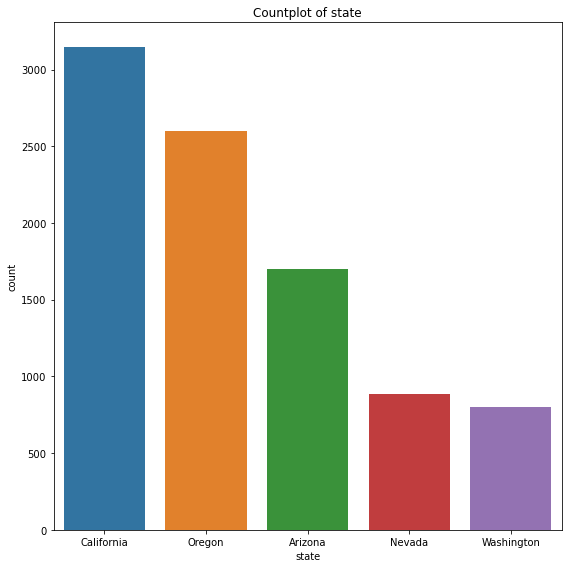

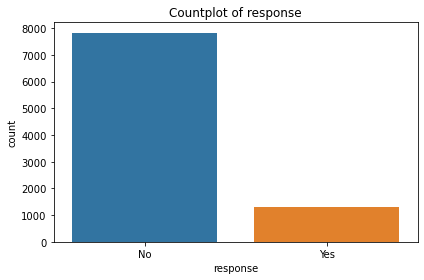

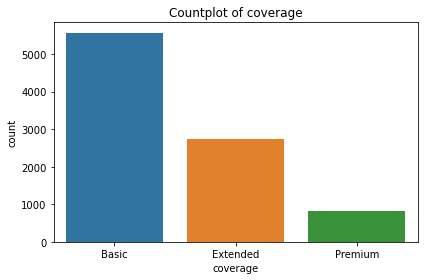

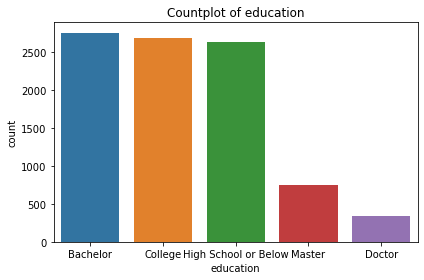

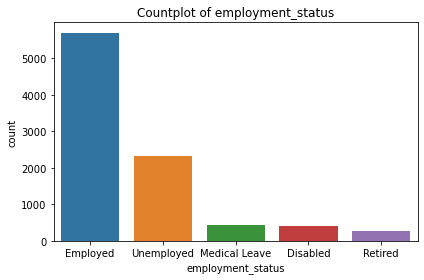

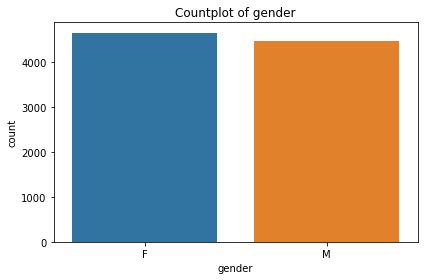

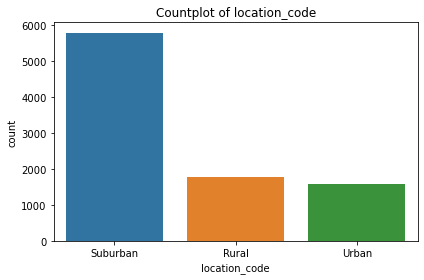

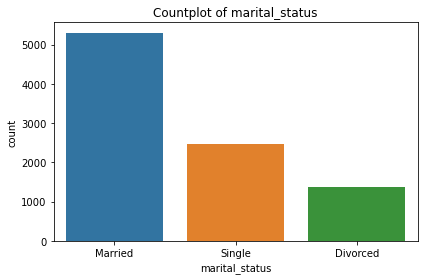

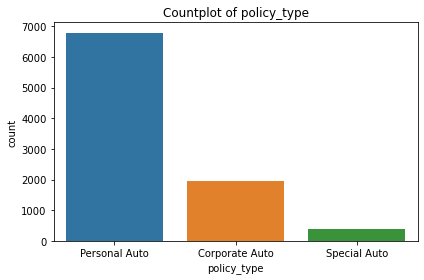

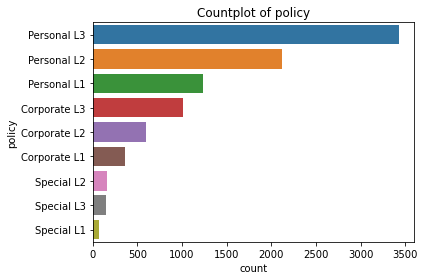

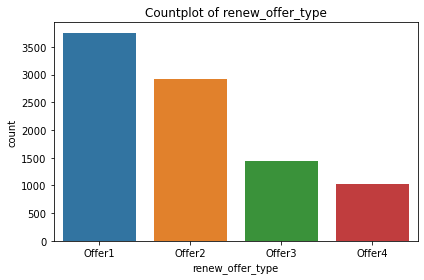

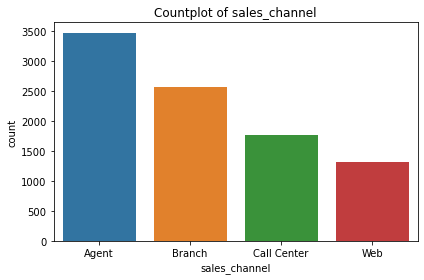

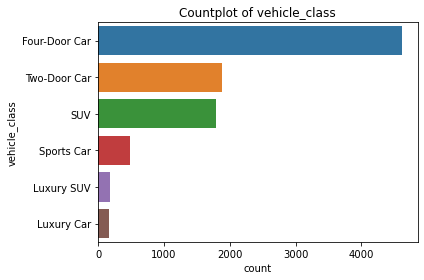

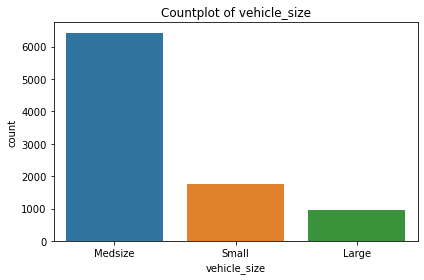

In [29]:
create_countplots(categorical)

### 2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [30]:
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [31]:
#check
categorical['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [32]:
#check
categorical['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [33]:
def clean_policy(policy:str) -> str:
    '''
    This function determines which policy belongs to L1, L2 or L3.
    
    Input: 
    policy:str
    
    Output:
    the category(L1, L2 or L3):str

    '''
    
    policies = {"L1":['Personal L1','Corporate L1','Special L1'],
              "L2":['Personal L2','Corporate L2','Special L2'],
              "L3":['Personal L3','Corporate L3','Special L3']}
    
    
    for key in policies:
        if policy in policies[key]:
            
            return key
        else:
            pass
    
    return "Other"

In [34]:
categorical2 = categorical.copy()
categorical['policy'] = categorical['policy'].apply(lambda x: clean_policy(x) )
categorical['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

### 3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

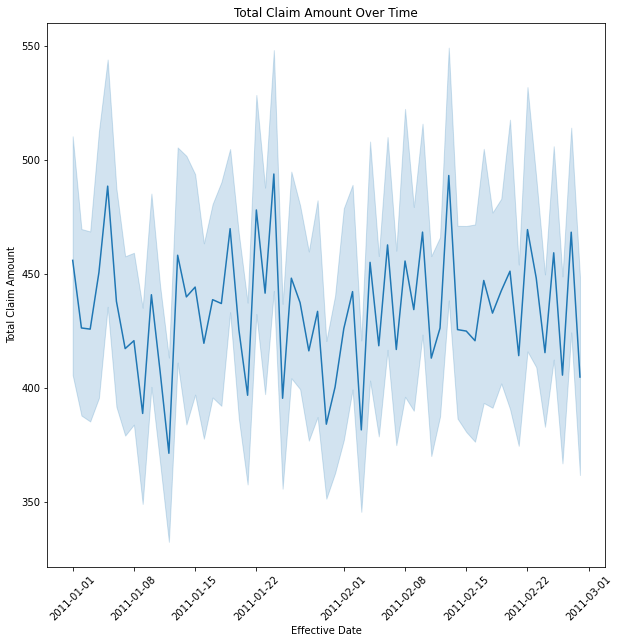

In [35]:
plt.figure(figsize=(10, 10))

# Create the line plot
sns.lineplot(data=data, x='effective_to_date', y='total_claim_amount')

# Set labels and title
plt.xlabel('Effective Date')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount Over Time')


plt.xticks(rotation=45)

# Display the plot
plt.show()

### 4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
・day with the day number of effective_to_date

・day_name with the day NAME of effective_to_date

・week with the week of effective_to_date

・month with the month NAME of effective_to_date

・total_claim_amount with total_claim_amount

In [36]:
new_df = data.copy()
new_df['day'] = new_df['effective_to_date'].dt.day
new_df['day_name'] = new_df['effective_to_date'].dt.day_name()
new_df['week'] = new_df['effective_to_date'].dt.isocalendar().week
new_df['month'] = new_df['effective_to_date'].dt.month

new_df = new_df[['day','day_name','week','month','total_claim_amount']]
new_df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,2,384.811147
1,31,Monday,5,1,1131.464935
2,19,Saturday,7,2,566.472247
3,20,Thursday,3,1,529.881344
4,3,Thursday,5,2,138.130879


### 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [37]:
groupby = new_df.groupby(['day_name']).agg({'total_claim_amount': ['sum'] })
groupby = groupby.round(2)
groupby = groupby.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(groupby)

,total_claim_amount
,sum
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


### 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

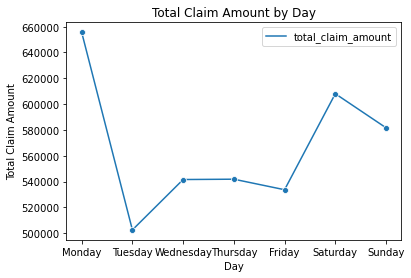

In [38]:

# Create the line plot using seaborn
sns.lineplot(data=groupby, marker='o')

# Set the plot title and axes labels
plt.title('Total Claim Amount by Day')
plt.xlabel('Day')
plt.ylabel('Total Claim Amount')

# Display the plot
plt.show()


#### Tuesday has the minimum amount of claim.

### 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [39]:
groupby2 = new_df.groupby(['day_name']).agg({'total_claim_amount': ['count'] })
groupby2 = groupby2.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(groupby2)

,total_claim_amount
,count
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


### 8.Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [40]:
groupby3 = new_df.groupby(['day_name']).agg({'total_claim_amount': ['median'] })
groupby3 = groupby3.sort_values(by=('total_claim_amount', 'median'), ascending=False)
display(groupby3)

,total_claim_amount
,median
day_name,
Thursday,395.328407
Wednesday,392.235698
Monday,385.735705
Sunday,383.721164
Saturday,379.200000
Tuesday,378.490829
Friday,371.803029


### 9. Plot the median "target" by day of the week name using a seaborn barplot

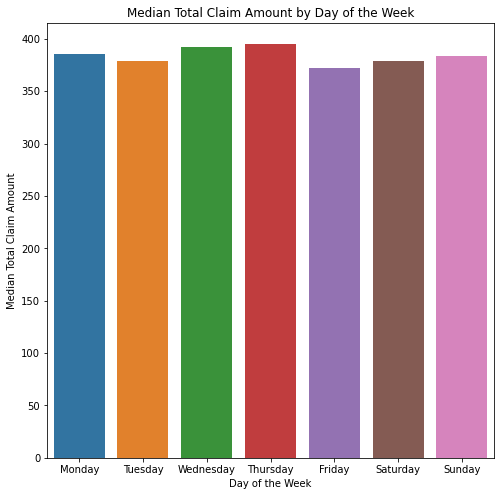

In [41]:
plt.figure(figsize=(8, 8))

median_by_day = new_df.groupby('day_name')['total_claim_amount'].median().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(data=median_by_day, x='day_name', y='total_claim_amount', order=day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Median Total Claim Amount')
plt.title('Median Total Claim Amount by Day of the Week')
plt.show()


### 10.What can you conclude from this analysis?

####  There are  no significant differences among the number of claims by days of a week. However, looking at the amounts of total claims varies according to days of a week.   

### 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [42]:
groupby_month = new_df.groupby(['month']).agg({'total_claim_amount': ['sum'] })
groupby_month = groupby_month.round(2)
groupby_month = groupby_month.reindex(index=[1,2])
display(groupby_month)

,total_claim_amount
,sum
month,
1,2117142.86
2,1847824.19


### 12.Can you do a monthly analysis given the output of the previous series? Why?

#### It will be difficult to od a monthly analysis because the values of month are only 1 and 2. Therefore, only two values are not enough to analyse it. 

### 13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [43]:
continuous_df.shape

(9134, 5)

In [44]:
def remove_outliers(df: pd.DataFrame,threshold: int=3) ->list:
    '''
    This function remove the outliers of a numerical continuous column 
    depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3)

    Input:
    df: Pandas DataFrame

    Output:
    df. pd.DataFrame
    
    '''
    
    df2 = df.copy()

    for i in df.columns:
        outliers_zscore1 = detect_outliers_zscore(df2, i)
        df2.drop(outliers_zscore1, axis=0, inplace=True)

    
    
    

    return df2

### 14.Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [45]:
continuous_df2 = continuous_df.copy()


In [46]:
continuous_clean_df = remove_outliers(continuous_df2)
display(continuous_clean_df.shape)
display(continuous_clean_df.skew())

(8575, 5)

customer_lifetime_value          1.876279
income                           0.276950
monthly_premium_auto             1.207313
months_since_policy_inception    0.049471
total_claim_amount               0.526682
dtype: float64

### 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [47]:
# drop the total_claim_amount of time_df
time_df = new_df.drop('total_claim_amount', axis=1)

#concatanate
dataframe = pd.concat([continuous_clean_df, discrete_df, categorical, time_df], axis=1)

display(dataframe.head())
display(dataframe.isnull().sum())
display(dataframe.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2


customer_lifetime_value          559
income                           559
monthly_premium_auto             559
months_since_policy_inception    559
total_claim_amount               559
months_since_last_claim            0
number_of_open_complaints          0
number_of_policies                 0
state                              0
response                           0
coverage                           0
education                          0
employment_status                  0
gender                             0
location_code                      0
marital_status                     0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
vehicle_class                      0
vehicle_size                       0
day                                0
day_name                           0
week                               0
month                              0
dtype: int64

(9134, 26)

In [48]:
dataframe2 = dataframe.dropna().reset_index()
dataframe2.isnull().sum()

index                            0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employment_status                0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
day                              0
day_name                         0
week                             0
month                            0
dtype: int64

In [49]:
dataframe2.shape

(8575, 27)

### 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [50]:
dataframe2.columns

Index(['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'day_name', 'week', 'month'],
      dtype='object')

In [51]:
columns = ['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'day_name', 'week', 'month', 'total_claim_amount']

dataframe2 = dataframe2[columns]
dataframe2.head(1)

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147


### 17.Turn the response column values into (Yes=1/No=0)

In [52]:
replace = {"Yes": 1, "No": 0}
dataframe2['response'] = dataframe2['response'].replace(replace)

display(dataframe2['response'].dtypes)
display(dataframe2.head(3))

dtype('int64')

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247


In [53]:
#check
dataframe2['response'].value_counts()

0    7339
1    1236
Name: response, dtype: int64

### 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [54]:
dataframe2['education'].value_counts()

Bachelor                2585
College                 2531
High School or Below    2441
Master                   690
Doctor                   328
Name: education, dtype: int64

In [55]:
df3 = dataframe2.copy()
df3["education"] = np.where(df3["education"].isin(["Bachelor","College","High School or Below"])==False,"Graduate",df3["education"])
df3['education'].value_counts()

Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

### 19.Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [56]:
df3['employment_status'].value_counts()

Employed         5384
Unemployed       2127
Medical Leave     409
Disabled          381
Retired           274
Name: employment_status, dtype: int64

In [57]:
df4 = df3.copy()
df4["employment_status"] = np.where(df4["employment_status"].isin(["Employed","Unemployed"])==False,"Inactive",df4["employment_status"])
df4['employment_status'].value_counts()

Employed      5384
Unemployed    2127
Inactive      1064
Name: employment_status, dtype: int64

### 20. Deal with column Gender turning the values into (1/0).

In [58]:
df4['gender'].value_counts()

F    4383
M    4192
Name: gender, dtype: int64

In [59]:
df5 = df4.copy()

replacement = {"F": 0, "M": 1}
df5['gender'] = df5['gender'].replace(replacement)

display(df5['gender'].value_counts())
display(df5['gender'].dtypes)

0    4383
1    4192
Name: gender, dtype: int64

dtype('int64')

### 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [60]:
df5['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Sports Car        430
Luxury Car         41
Luxury SUV         31
Name: vehicle_class, dtype: int64

In [61]:
df6 = df5.copy()

df6["vehicle_class"] = np.where(df6["vehicle_class"].isin(["Luxury Car","Luxury SUV"])==True,"Luxury",df4["vehicle_class"])
df6['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Sports Car        430
Luxury             72
Name: vehicle_class, dtype: int64

### 22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [62]:
df6['coverage'].value_counts()

Basic       5353
Extended    2541
Premium      681
Name: coverage, dtype: int64

In [63]:
df7 = df6.copy()
encoding = {"Basic": 1, "Extended": 2, "Premium": 3}
df7['coverage'] = df7['coverage'].replace(encoding)
df7['coverage'].value_counts()

1    5353
2    2541
3     681
Name: coverage, dtype: int64

### 23.Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed". 

In [64]:
df8 = df7.copy()
df8['employment_status'].value_counts()

Employed      5384
Unemployed    2127
Inactive      1064
Name: employment_status, dtype: int64

In [65]:
encoding2 = {"Unemployed": 1, "Inactive": 2, "Employed": 3}
df8['employment_status'] = df8['employment_status'].replace(encoding2)
df8['employment_status'].value_counts()

3    5384
1    2127
2    1064
Name: employment_status, dtype: int64

### 24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [66]:
df8['location_code'].value_counts()

Suburban    5342
Rural       1710
Urban       1523
Name: location_code, dtype: int64

In [67]:
df9 = df8.copy()
encoding3 = {"Rural": 1, "Suburban": 2, "Urban": 3}
df9['location_code'] = df9['location_code'].replace(encoding3)
df9['location_code'].value_counts()

2    5342
1    1710
3    1523
Name: location_code, dtype: int64

### 25.Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [68]:
df9['vehicle_size'].value_counts()

Medsize    6033
Small      1644
Large       898
Name: vehicle_size, dtype: int64

In [69]:
df10 = df9.copy()
encoding4 = {"Small": 1, "Medsize": 2, "Large": 3}
df10['vehicle_size'] = df10['vehicle_size'].replace(encoding4)
df10['vehicle_size'].value_counts()

2    6033
1    1644
3     898
Name: vehicle_size, dtype: int64

### 26. Get a dataframe with the categorical nominal columns

In [70]:
df10.head()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,...,L3,Offer1,Agent,Two-Door Car,2,24,Thursday,8,2,384.811147
1,1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,...,L3,Offer3,Agent,Four-Door Car,2,31,Monday,5,1,1131.464935
2,2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,...,L3,Offer1,Agent,Two-Door Car,2,19,Saturday,7,2,566.472247
3,3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,...,L2,Offer1,Call Center,SUV,2,20,Thursday,3,1,529.881344
4,4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,...,L1,Offer1,Agent,Four-Door Car,2,3,Thursday,5,2,138.130879


In [71]:
df10.dtypes

index                              int64
customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_policy_inception    float64
months_since_last_claim            int64
number_of_open_complaints          int64
number_of_policies                 int64
state                             object
response                           int64
coverage                           int64
education                         object
employment_status                  int64
gender                             int64
location_code                      int64
marital_status                    object
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                       int64
day                                int64
day_name                          object
week            

In [72]:
categorical_nominal = df10.select_dtypes('object')

In [73]:
categorical_nominal.head()

,state,education,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Bachelor,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Thursday
1,Arizona,Bachelor,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Monday
2,Nevada,Bachelor,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Saturday
3,California,Bachelor,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Thursday
4,Washington,Bachelor,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Thursday


### 27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column

In [74]:

# Create an empty list to store the levels
levels = []

# Iterate over each categorical nominal column in the DataFrame
for column in categorical_nominal.columns:  # Filter columns of object data type
    
    column_list = []
    for i in categorical_nominal[column].unique():
        column_list.append(column + '_' + i)
    
    levels.append(column_list)
  

print(levels)


[['state_Washington', 'state_Arizona', 'state_Nevada', 'state_California', 'state_Oregon'], ['education_Bachelor', 'education_College', 'education_Graduate', 'education_High School or Below'], ['marital_status_Married', 'marital_status_Single', 'marital_status_Divorced'], ['policy_type_Corporate Auto', 'policy_type_Personal Auto', 'policy_type_Special Auto'], ['policy_L3', 'policy_L2', 'policy_L1'], ['renew_offer_type_Offer1', 'renew_offer_type_Offer3', 'renew_offer_type_Offer2', 'renew_offer_type_Offer4'], ['sales_channel_Agent', 'sales_channel_Call Center', 'sales_channel_Web', 'sales_channel_Branch'], ['vehicle_class_Two-Door Car', 'vehicle_class_Four-Door Car', 'vehicle_class_SUV', 'vehicle_class_Sports Car', 'vehicle_class_Luxury'], ['day_name_Thursday', 'day_name_Monday', 'day_name_Saturday', 'day_name_Tuesday', 'day_name_Wednesday', 'day_name_Sunday', 'day_name_Friday']]


### 28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [75]:
from sklearn.preprocessing import OneHotEncoder


categorical_nominal3 = categorical_nominal.copy()
encoder = OneHotEncoder(drop='first')
encoder.fit(categorical_nominal3)


categoricals_nominal_encoded = encoder.transform(categorical_nominal3).toarray()

categoricals_nominal_encoded = pd.DataFrame(categoricals_nominal_encoded, columns = encoder.get_feature_names_out(), index=categorical_nominal3.index)

display(categoricals_nominal_encoded.head())

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_type_Personal Auto,...,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Lab | Comparing regression models

### 1.Define X and y

In [76]:
#check
df10.head()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,...,L3,Offer1,Agent,Two-Door Car,2,24,Thursday,8,2,384.811147
1,1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,...,L3,Offer3,Agent,Four-Door Car,2,31,Monday,5,1,1131.464935
2,2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,...,L3,Offer1,Agent,Two-Door Car,2,19,Saturday,7,2,566.472247
3,3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,...,L2,Offer1,Call Center,SUV,2,20,Thursday,3,1,529.881344
4,4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,...,L1,Offer1,Agent,Four-Door Car,2,3,Thursday,5,2,138.130879


In [77]:
X = df10.drop('total_claim_amount', axis=1)  
y = df10['total_claim_amount']


### 2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31 

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

### 3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [79]:
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])
X_train_cat = X_train.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['float64', 'int64'])
X_test_cat = X_test.select_dtypes(include=['object'])

### 4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [80]:
from sklearn.preprocessing import OneHotEncoder


X_train_cat1 = X_train_cat.copy()
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat1)


encoded_X_train_cat = encoder.transform(X_train_cat1).toarray()

encoded_X_train_cat = pd.DataFrame(encoded_X_train_cat, columns = encoder.get_feature_names_out(), index=X_train_cat1.index)

display(encoded_X_train_cat.head(5))


X_test_cat1 = X_test_cat.copy()
encoder = OneHotEncoder(drop='first')
encoder.fit(X_test_cat1)


encoded_X_test_cat = encoder.transform(X_test_cat1).toarray()

encoded_X_test_cat = pd.DataFrame(encoded_X_test_cat, columns = encoder.get_feature_names_out(), index=X_test_cat1.index)

display(encoded_X_test_cat.head(5))

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_type_Personal Auto,...,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
7257,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5720,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8478,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_type_Personal Auto,...,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
2296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4306,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1684,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df

In [81]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train_num)


X_train_num_transformed = pt.transform(X_train_num)
X_test_num_transformed = pt.transform(X_test_num)


X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

display(X_train_num_transformed_df.skew())
display(X_test_num_transformed_df.skew())

index                           -0.294234
customer_lifetime_value          0.034847
income                          -0.872762
monthly_premium_auto             0.165159
months_since_policy_inception   -0.248648
months_since_last_claim         -0.180223
number_of_open_complaints        1.459105
number_of_policies               0.199382
response                         2.074089
coverage                         0.542188
employment_status               -0.647240
gender                           0.035336
location_code                   -0.028369
vehicle_size                     0.014634
day                             -0.213141
month                            0.146378
dtype: float64

index                           -0.250649
customer_lifetime_value          0.011782
income                          -0.863377
monthly_premium_auto             0.114467
months_since_policy_inception   -0.227366
months_since_last_claim         -0.179470
number_of_open_complaints        1.450831
number_of_policies               0.210546
response                         1.923433
coverage                         0.558867
employment_status               -0.642607
gender                           0.066145
location_code                   -0.017527
vehicle_size                     0.022944
day                             -0.218274
month                            0.161519
dtype: float64

### 6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [82]:
X_train_new = pd.concat([X_train_num_transformed_df,encoded_X_train_cat], axis=1 )
X_test_new = pd.concat([X_test_num_transformed_df,encoded_X_test_cat], axis=1 )

display(X_train_new.head())
display(X_test_new.head())

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,...,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
7257,1.129602,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679,-0.403674,1.193921,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5720,0.610470,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627,-0.403674,-0.773705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8210,1.439121,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627,-0.403674,-0.773705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,-0.401732,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793,-0.403674,1.193921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8478,1.524455,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627,2.477245,-0.773705,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,...,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
2296,-0.734425,-0.215250,0.896246,-1.144354,0.739978,-0.967315,2.023394,1.658115,2.477245,-0.773705,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4306,0.092943,0.866255,0.465699,1.312075,1.641510,1.192979,-0.508609,0.506547,-0.403674,1.193921,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5074,0.379119,-0.324084,0.703730,1.249617,1.188241,1.399949,-0.508609,-1.134627,2.477245,-0.773705,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1684,-1.025145,-1.115593,1.020217,-0.185418,-0.255762,-0.828374,-0.508609,-1.134627,-0.403674,1.193921,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6296,0.810475,-0.249609,1.038877,-1.541686,-0.516907,-1.680526,-0.508609,1.306339,-0.403674,-0.773705,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 7.Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

In [83]:
from sklearn.preprocessing import MinMaxScaler


# Scaling data
transformer = MinMaxScaler().fit(X_train_new) 

X_train_normalized = transformer.transform(X_train_new)
X_test_normalized  = transformer.transform(X_test_new)

X_train_new_scaled_df = pd.DataFrame(X_train_normalized, columns=X_train_new.columns, index= X_train_new.index)
X_test_new_scaled_df  = pd.DataFrame(X_test_normalized, columns=X_test_new.columns, index= X_test_new.index)

In [84]:
X_train_new_scaled_df.describe()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,...,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
count,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.00000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.583790,0.490346,0.598424,0.419399,0.561128,0.540223,0.200575,0.406277,0.14012,0.326264,...,0.009330,0.189270,0.048817,0.220427,0.166611,0.156948,0.146285,0.138620,0.123792,0.134289
std,0.267668,0.222083,0.359903,0.272062,0.267381,0.276548,0.394392,0.358101,0.34714,0.421726,...,0.096149,0.391756,0.215503,0.414569,0.372659,0.363782,0.353421,0.345579,0.329372,0.340991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376829,0.335176,0.508942,0.179127,0.351252,0.311157,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.610052,0.486223,0.729278,0.384760,0.586510,0.556958,0.000000,0.382401,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.814469,0.644373,0.871257,0.679397,0.783496,0.768385,0.000000,0.717367,0.00000,0.829730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8.Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [85]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train_new_scaled_df, y_train)


y_train_pred = model.predict(X_train_new_scaled_df)
y_test_pred = model.predict(X_test_new_scaled_df)

### 9.Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


def error_metrics_report(y: list, y_pred: list) -> pd.DataFrame:
    '''
    This function takes the real values and any model predictions for the Train and Test sets and returns a Pandas
    DataFrame with a summary of error metrics for the Train and Test sets like this:

    | Metric | Value | 
    |--------|-------|
    | MAE    | value | 
    | MSE    | value | 
    | RMSE   | value | 
    | MAPE   | value | 
    | R2     | value | 

    Inputs:
    x: list
    
    y:list
    
    Output:
    pd.DataFrame
    
    '''

    # Mean absolute error
    MAE = mean_absolute_error(y, y_pred)
    

    # Mean squared error
    MSE = mean_squared_error(y, y_pred)
    

    # Root mean squared error
    RMSE = mean_squared_error(y, y_pred, squared=False)
    
    # Mean absolute percentage error
    MAPE = mean_absolute_percentage_error(y, y_pred)

    # R2
    R2 = r2_score(y, y_pred)


    metrics = {"Error_Metric": ["MAE","MSE", "RMSE", "MAPE", "R2"], 
               "Value": [MAE, MSE, RMSE, MAPE, R2]}

    metrics_df = pd.DataFrame(metrics).round(2)

    return metrics_df

### 10.Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [87]:
error_metrics_report(y_train, y_train_pred)

,Error_Metric,Value
0,MAE,118.23
1,MSE,22819.40
2,RMSE,151.06
3,MAPE,1.57
4,R2,0.54


In [88]:
error_metrics_report(y_test, y_test_pred)

,Error_Metric,Value
0,MAE,119.14
1,MSE,23570.09
2,RMSE,153.53
3,MAPE,1.68
4,R2,0.52


### 11.Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [89]:
def train_models(models: list, X_train: list, y_train: list)-> list:
    '''
    This function takes  as an input: list of models, X_train and y_train 
    to train several model (with default values)
    
    Input
    models: list 
    X_train: list 
    y_train: list
    
    Output: list
    
    '''
    
    trained_models = []
    
    for model in models:
        if model == 'LinearRegression':
            reg = LinearRegression()
        elif model == 'KNeighborsRegressor':
            reg = KNeighborsRegressor(n_neighbors=3)
        elif model == 'MLPRegressor':
            reg = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
        else:
            print("error")
    
        a = reg.fit(X_train_new_scaled_df, y_train)
        trained_models.append(a)
    
    return trained_models
        
        
        
        

### 12. Use the function to train the following models (with default settings):

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = ['LinearRegression', 'KNeighborsRegressor', 'MLPRegressor']
trained_models = train_models(models, X_train_new_scaled_df, y_train)


/Users/soichirotanabe/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
trained_models

[LinearRegression(),
 KNeighborsRegressor(n_neighbors=3),
 MLPRegressor(hidden_layer_sizes=(100, 50))]

### 15.Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?

In [92]:

for i in trained_models:
        
    
    y_train_pred = i.predict(X_train_new_scaled_df)
    y_test_pred = i.predict(X_test_new_scaled_df)    
    print(i)
    print('train')
    display(error_metrics_report(y_train, y_train_pred))
        
    print('test')
    display(error_metrics_report(y_test, y_test_pred))
    print()
    print()

LinearRegression()
train


,Error_Metric,Value
0,MAE,118.23
1,MSE,22819.40
2,RMSE,151.06
3,MAPE,1.57
4,R2,0.54


test


,Error_Metric,Value
0,MAE,119.14
1,MSE,23570.09
2,RMSE,153.53
3,MAPE,1.68
4,R2,0.52




KNeighborsRegressor(n_neighbors=3)
train


,Error_Metric,Value
0,MAE,92.38
1,MSE,16670.39
2,RMSE,129.11
3,MAPE,1.27
4,R2,0.66


test


,Error_Metric,Value
0,MAE,130.38
1,MSE,32689.41
2,RMSE,180.80
3,MAPE,1.97
4,R2,0.33




MLPRegressor(hidden_layer_sizes=(100, 50))
train


,Error_Metric,Value
0,MAE,86.21
1,MSE,13965.46
2,RMSE,118.18
3,MAPE,0.96
4,R2,0.72


test


,Error_Metric,Value
0,MAE,88.66
1,MSE,14993.26
2,RMSE,122.45
3,MAPE,1.18
4,R2,0.69


### Evaluation:  There is a huge difference between a Train and Test set in KNeighborsRegressor. Therefore, this model is not a good model. In addition, compared to LinearRegression, Train and Test sets in MLPRegressor model have slightly lower RMSE and MAPE values and slightly higher R2 values. Therefore, MLPRegressor model is the best among these models. 